In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Warnings
import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
# Data Loading
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD']].set_index('date')

In [4]:
data

,USD
date,
2010-01-04,1161.0
2010-01-05,1147.3
2010-01-06,1141.4
2010-01-07,1132.0
2010-01-08,1134.1
...,...
2020-01-10,1160.0
2020-01-13,1161.1
2020-01-14,1155.7


In [5]:
# Data Shfit 생성    
cnt = ['USD']
for step1 in cnt : 
    for step2 in range(1,21):
        data['{}_shift-{}'.format(step1,step2)] = data[step1].shift(step2)

# Nan Omit
data = data.dropna()

In [6]:
data

,USD,USD_shift-1,USD_shift-2,USD_shift-3,USD_shift-4,USD_shift-5,USD_shift-6,USD_shift-7,USD_shift-8,USD_shift-9,...,USD_shift-11,USD_shift-12,USD_shift-13,USD_shift-14,USD_shift-15,USD_shift-16,USD_shift-17,USD_shift-18,USD_shift-19,USD_shift-20
date,,,,,,,,,,,,,,,,,,,,,
2010-02-01,1160.5,1159.1,1161.0,1160.5,1143.3,1148.7,1148.7,1137.9,1128.0,1123.4,...,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0,1141.4,1147.3,1161.0
2010-02-02,1158.0,1160.5,1159.1,1161.0,1160.5,1143.3,1148.7,1148.7,1137.9,1128.0,...,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0,1141.4,1147.3
2010-02-03,1151.6,1158.0,1160.5,1159.1,1161.0,1160.5,1143.3,1148.7,1148.7,1137.9,...,1123.4,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0,1141.4
2010-02-04,1153.3,1151.6,1158.0,1160.5,1159.1,1161.0,1160.5,1143.3,1148.7,1148.7,...,1128.0,1123.4,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0
2010-02-05,1171.5,1153.3,1151.6,1158.0,1160.5,1159.1,1161.0,1160.5,1143.3,1148.7,...,1137.9,1128.0,1123.4,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-10,1160.0,1174.1,1165.3,1169.6,1162.7,1156.9,1157.8,1157.8,1160.9,1161.2,...,1161.7,1162.6,1164.5,1165.3,1166.7,1172.9,1171.7,1188.6,1193.3,1192.0
2020-01-13,1161.1,1160.0,1174.1,1165.3,1169.6,1162.7,1156.9,1157.8,1157.8,1160.9,...,1163.7,1161.7,1162.6,1164.5,1165.3,1166.7,1172.9,1171.7,1188.6,1193.3
2020-01-14,1155.7,1161.1,1160.0,1174.1,1165.3,1169.6,1162.7,1156.9,1157.8,1157.8,...,1161.2,1163.7,1161.7,1162.6,1164.5,1165.3,1166.7,1172.9,1171.7,1188.6


In [7]:
# X, y
X = data[data.columns[1:]]
y = data[data.columns[0]]

In [8]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)
sc_y = MinMaxScaler()
y = sc_y.fit_transform(y.values.reshape(-1,1))

In [9]:
# Train Validation Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1234)

In [10]:
# Data Size
print('Train Set Size : {:,} obs' .format(len(X_train)))
print('Valid Set Size : {:,} obs' .format(len(X_valid)))
print('Test Set Size : {:,} obs' .format(len(X_test)))

Train Set Size : 1,774 obs
Valid Set Size : 444 obs
Test Set Size : 247 obs


In [11]:
# Sklearn Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [12]:
# Score
print("Train Score : {}" .format(reg.score(X_train, y_train)))
print("Valid Score : {}" .format(reg.score(X_valid, y_valid)))
print("Test Score : {}" .format(reg.score(X_test, y_test)))

Train Score : 0.9825877397449944
Valid Score : 0.9788965200248432
Test Score : 0.9764192653012354


In [13]:
# RMSE
from sklearn.metrics import mean_squared_error
pred_train = reg.predict(X_train)
print("Train rmse : {}" .format(mean_squared_error(y_train, pred_train)**0.5))
pred_valid = reg.predict(X_valid)
print("Valid rmse : {}" .format(mean_squared_error(y_valid, pred_valid)**0.5))
pred_test = reg.predict(X_test)
print("Test rmse : {}" .format(mean_squared_error(y_test, pred_test)**0.5))

Train rmse : 0.0236830334681015
Valid rmse : 0.02455672734450505
Test rmse : 0.025451963278305748


In [14]:
# Data Reverse
y_test_origin = sc_y.inverse_transform(y_test)
y_pred_origin = sc_y.inverse_transform(pred_test)

# Test Data
test = np.array([y_test_origin.reshape(-1), y_pred_origin.reshape(-1)]).transpose()
test = pd.DataFrame(test, columns = ['y_test', 'y_pred'])

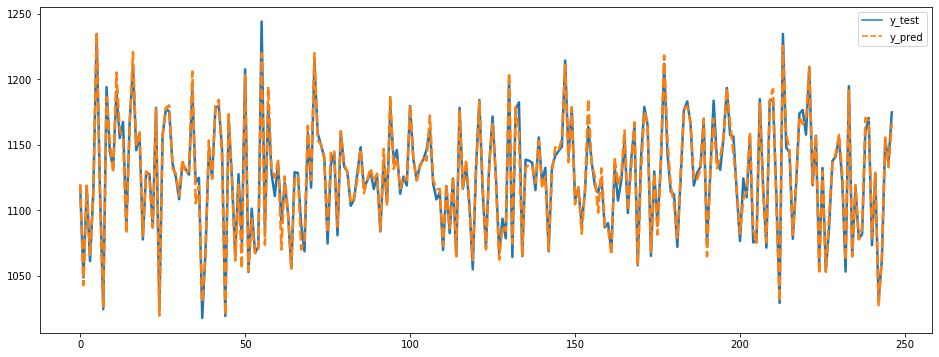

In [15]:
# Pred vs True Visualization
plt.figure(figsize = (16,6))
sns.lineplot(data = test, linewidth = 2.5)
plt.show()

In [16]:
# Date for 2020
date_list = pd.date_range('2020-01-02','2020-01-15', freq='B')
date_list = list(date_list.strftime('%Y-%m-%d'))

# Virtual Data Setting
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD']].set_index('date')
data = data[-31:-11]

# Virtual Prediction
for step in date_list :
    
    # Prediction
    virtual_X = sc_X.transform(np.array(data[-20:].T))
    pred = sc_y.inverse_transform(reg.predict(virtual_X)).reshape(-1)[0]
    pred_df = pd.DataFrame({'USD' : pred}, index=[step])

    # Data Append
    data = data.append(pred_df)

In [17]:
# Virtual 2020 Data
data = data[-10:]
usd_pred = data
usd_pred.columns = ['USD_PRED']

# Real 2020 Data
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD']].set_index('date')
data = data[-11:-1]
usd_true = data
usd_true.columns = ['USD_TRUE']

# Concat
virtual_data = pd.concat([usd_true, usd_pred], axis=1)

In [18]:
virtual_data

,USD_TRUE,USD_PRED
date,,
2020-01-02,1157.8,1179.785098
2020-01-03,1156.9,1186.013957
2020-01-06,1162.7,1192.704499
2020-01-07,1169.6,1190.260095
2020-01-08,1165.3,1188.649306
2020-01-09,1174.1,1188.901516
2020-01-10,1160.0,1191.803734
2020-01-13,1161.1,1194.214870
2020-01-14,1155.7,1187.912541


In [19]:
# RMSE
from sklearn.metrics import mean_squared_error
print("Train rmse : {}" .format(mean_squared_error(virtual_data['USD_TRUE'], virtual_data['USD_PRED'])**0.5))

Train rmse : 26.22029707851102


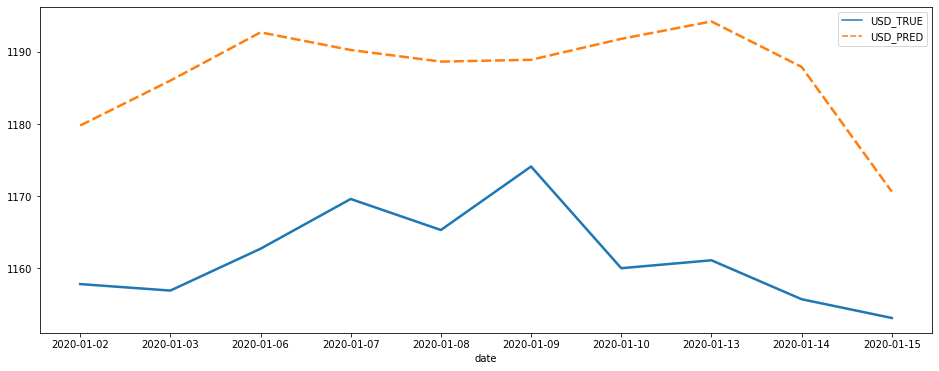

In [20]:
# Pred vs True Visualization
plt.figure(figsize = (16,6))
sns.lineplot(data = virtual_data, linewidth = 2.5)
plt.show()

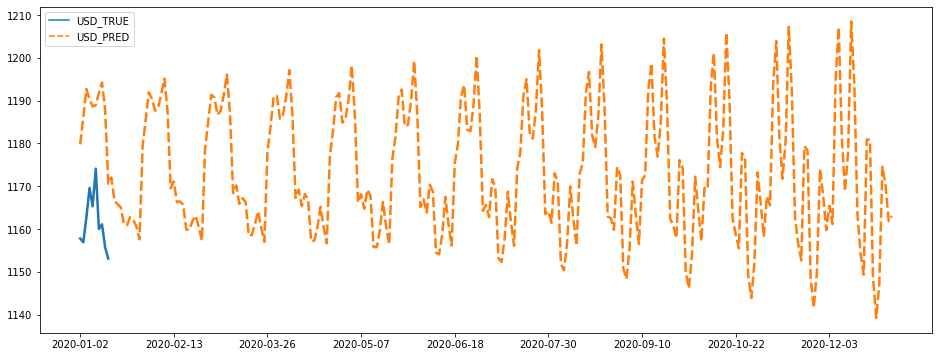

In [21]:
# Date for 2020
date_list = pd.date_range('2020-01-02','2020-12-31', freq='B')
date_list = list(date_list.strftime('%Y-%m-%d'))

# Virtual Data Setting
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD']].set_index('date')
data = data[-31:-11]

# Virtual Prediction
for step in date_list :
    
    # Prediction
    virtual_X = sc_X.transform(np.array(data[-20:].T))
    pred = sc_y.inverse_transform(reg.predict(virtual_X)).reshape(-1)[0]
    pred_df = pd.DataFrame({'USD' : pred}, index=[step])

    # Data Append
    data = data.append(pred_df)
    
# Virtual 2020 Data
data = data[20:]
usd_pred = data
usd_pred.columns = ['USD_PRED']

# Real 2020 Data
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD']].set_index('date')
data = data[-11:-1]
usd_true = data
usd_true.columns = ['USD_TRUE']

# Concat
virtual_data = pd.concat([usd_true, usd_pred], axis=1)

# Pred vs True Visualization
plt.figure(figsize = (16,6))
ax = sns.lineplot(data = virtual_data, linewidth = 2.5)
ax.set(xticks=virtual_data.index[0::30])
plt.show()